¿Es posible predecir la prima del seguro de pacientes según sus características? En esta actividad responderás esta pregunta. Las variables de estudio son:

Age: Edad del asegurado.

BMI: Índice de masa corporal del asegurado.

Children: Número de hijos que dependen del asegurado.

Charges: Variable a predecir. Cantidad asegurada en dólares.

Las instrucciones de la actividad son las siguientes:

    1. Descargar la base de datos insurance_clean.csv (Este archivo debe de colocarse en la misma carpeta que el cuaderno que utilices).

    2. Leer el conjunto de datos con la ayuda de la librería Pandas.

    3. Separar el conjunto de datos en dos variables ("X" para la columna "age" y "Y" para la variable de "charges")

    4. Separar las variables "X" y "Y" en conjuntos de entrenamiento y prueba, utilizando el método train_test_split de la librería sklearn.model_selection.

    5. Construir un modelo de regresión lineal usando "LinearRegresion" de la librería sklearn.linear_model, utilizando en el eje de las "x" solamente la columna correspondiente a la variable "age", y en el eje de las "y" la variable "charges".

    6. Evaluar el modelo con la métrica r2_score tanto en el conjunto de entrenamiento como en el de prueba.

    7. Repetir los pasos 5 y 6 sustituyendo la variable "age" por "BMI" y escribe en tu libreta de Jupyter por qué no es una variable relevante para realizar una predicción acertada del costo del servicio médico.

    8. Guardar todo el ejercicio hecho en tu libreta de Jupyter.

    9. Guarda el archivo en una carpeta comprimida.

    10. Comparte tu carpeta comprimida en la plataforma de edX.

El modelo consiste en obtener una prima (una prima) para el paciente del seguro según ciertas caracteristicas. Por lo tanto, entra en un problema de regresión.

In [3]:
import pandas as pd
insurancedata = pd.read_csv("insurance_clean.csv")

In [6]:
#Primero analizamos la data para tener una idea de nuestro dataset
insurancedata.head() 

,Unnamed: 0,age,bmi,children,charges
0,1,18,33.77,1,1725.5523
1,2,28,33.00,3,4449.4620
2,4,32,28.88,0,3866.8552
3,5,31,25.74,0,3756.6216
4,6,46,33.44,1,8240.5896


In [5]:
insurancedata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
Unnamed: 0    712 non-null int64
age           712 non-null int64
bmi           712 non-null float64
children      712 non-null int64
charges       712 non-null float64
dtypes: float64(2), int64(3)
memory usage: 27.9 KB


In [7]:
insurancedata.describe() #No hay valores nulos para limpiar. Edad promedio 33 años, Charges promedio 5207. Valores de minimos, maximos y cuartiles

,Unnamed: 0,age,bmi,children,charges
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,670.205056,33.091292,30.260351,1.075843,5207.231751
std,382.925911,10.516150,6.183319,1.175168,2586.608066
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,348.750000,23.750000,25.885000,0.000000,2803.088087
50%,674.000000,33.000000,29.922500,1.000000,4933.176000
75%,990.250000,42.000000,34.128750,2.000000,7350.650413
max,1336.000000,54.000000,53.130000,5.000000,9991.037650


Separamos nuestro dataset en las variables que vamos a utilizar. Las convertimos en arreglos de 1 columna

In [10]:
X= insurancedata["age"].values.reshape(-1,1)
y= insurancedata["charges"].values.reshape(-1,1)

Separamos en un conjunto de entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=100)

In [21]:
print("X: ", X.shape) #Vemos que con la distribucion del 80-20% (Train-Test) tenemos distribucion de registros de 569 train 143 test
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)

X:  (712, 1)
X train:  (569, 1)
X test:  (143, 1)


In [25]:
from sklearn.linear_model import LinearRegression
#Entrenamos nuestro modelo
reg = LinearRegression().fit(X_train,y_train)
#Realizamos predicciones
y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

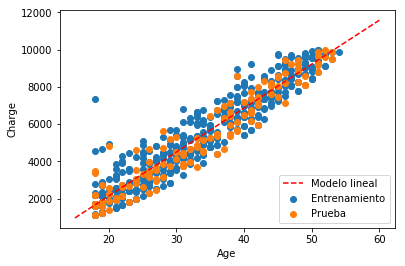

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_model= np.linspace(15,60,num=100)
y_model= reg.predict(x_model.reshape(-1,1))
plt.scatter(X_train, y_train, label= "Entrenamiento")
plt.scatter(X_test, y_test, label= "Prueba")
plt.plot(x_model, y_model, "--r", label= "Modelo lineal")
plt.xlabel("Age")
plt.ylabel("Charge")
plt.legend(loc="lower right")
plt.show()

In [42]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_hat)
r2_test = r2_score(y_test, y_test_hat)
print("R2_train es: {:.3f}, R2_test es: {:.3f}".format(r2_train, r2_test))

R2_train es: 0.915, R2_test es: 0.918
